In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.choice([1,2], size=10, p=[0.1, 0.9])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
np.random.uniform(low=[0, 9], high=[1, 10])

array([0.88453221, 9.27038666])

In [4]:
np.random.uniform(low=1, high=2)

1.515715479595011

In [5]:
def integrand(args):
    #return -(args[0]-3)**2+5
    #return 1/(args[0]-3)**2
    return 10*np.exp(-(1/0.01)*(args[0]-3)**2)

In [65]:
from typing import Callable, Iterable, List

def dist_conv(integrand:Callable, dims:int, boundaries:List[List[float]], bins_per_dim:int=10):
    # Prepare
    #bin_weights = []
    bin_bounds = []

    for i in range(dims):
        boundary_arr = []
        c_cur = boundaries[i][0]
        c_step = (boundaries[i][1] - boundaries[i][0])/bins_per_dim
        
        for j in range(bins_per_dim):
            boundary_arr.append([c_cur, c_cur + c_step])
            c_cur += c_step
        
        #bin_weights.append(np.ones(bins_per_dim, dtype=float) * 1/bins_per_dim)
        #bin_weights.append(1/bins_per_dim)
        bin_bounds.append(boundary_arr)
    
    # n_hyper_cubes = bins_per_dims**dims
    
    bin_indices = np.arange(bins_per_dim)
    bin_bounds = np.array(bin_bounds)
    
    # Generator
    def sample(n_samples:int=1):
        samples = []
        
        for i in range(dims):
            bin_idx = np.random.choice(bin_indices, size=n_samples)
            bins = bin_bounds[i][bin_idx].T
            
            samples_per_dim = np.random.uniform(low=bins[0], high=bins[1])
            samples.append(samples_per_dim)

        return np.array(samples)
    
    def learn(n_samples:int=1):
        samples = sample(n_samples)
        results = integrand(samples)
        
        # asd
        for j in range(dims):
            # surface per dim and bin
            k = 0 #bin_lower = 0

            sort_mask = np.argsort(samples[j])
            samples_per_dim = samples[j][sort_mask]
            results_per_dim = results[sort_mask]
            bounds_per_dim = boundaries[j]
            
            surf = np.trapz(results_per_dim, x=samples_per_dim)
            surf_per_bin = surf/bins_per_dim
            
            bin_vals = []
            
            for i in range(bins_per_dim):
                running_sum = 0
                k0 = k
                while running_sum < surf_per_bin and k < n_samples - 1:
                    running_sum += results_per_dim[k]*(
                        (samples_per_dim[k+1] if k > 0 else bounds_per_dim[1]) - 
                        (samples_per_dim[k] if k <= n_samples-1 else bounds_per_dim[0]) )
                    k += 1
                
                bin_vals.append([
                    boundaries[j][0] if i == 0 else samples_per_dim[k0],
                    boundaries[j][1] if i == bins_per_dim-1 else samples_per_dim[k]])
                
                print(f"{k0}-{k} : {bin_vals[-1][0]}-{bin_vals[-1][1]}")
                
            bin_bounds[j] = bin_vals
    
    return sample, learn

In [91]:
dims = 1
bins_per_dim = 30
boundaries = [[0., 6.]]
sample, learn = dist_conv(integrand, dims, boundaries, bins_per_dim=bins_per_dim)

(array([0.16502796, 0.16602813, 0.17753008, 0.16402779, 0.17452957,
        0.14702491, 0.16452787, 0.16452787, 0.16302762, 0.16202745,
        0.17152906, 0.16102728, 0.17452957, 0.17953042, 0.17052889,
        0.1635277 , 0.17552974, 0.15552635, 0.16252754, 0.17652991,
        0.16102728, 0.15102559, 0.16302762, 0.15802677, 0.15852686,
        0.16602813, 0.17652991, 0.17652991, 0.17252923, 0.17853025]),
 array([6.46329995e-04, 2.00612446e-01, 4.00578562e-01, 6.00544678e-01,
        8.00510794e-01, 1.00047691e+00, 1.20044303e+00, 1.40040914e+00,
        1.60037526e+00, 1.80034137e+00, 2.00030749e+00, 2.20027361e+00,
        2.40023972e+00, 2.60020584e+00, 2.80017195e+00, 3.00013807e+00,
        3.20010419e+00, 3.40007030e+00, 3.60003642e+00, 3.80000253e+00,
        3.99996865e+00, 4.19993477e+00, 4.39990088e+00, 4.59986700e+00,
        4.79983312e+00, 4.99979923e+00, 5.19976535e+00, 5.39973146e+00,
        5.59969758e+00, 5.79966370e+00, 5.99962981e+00]),
 <BarContainer object of 30 

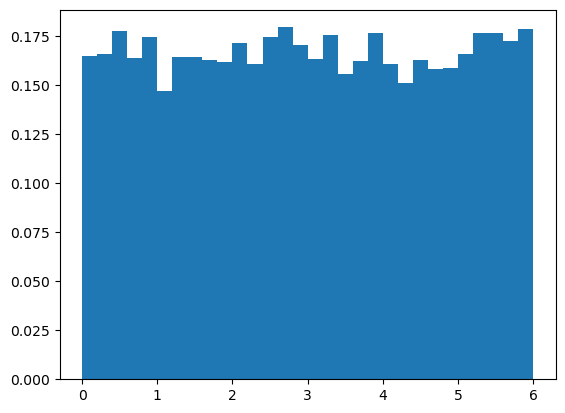

In [92]:
n_samples = 10000
samples = sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)

In [101]:
learn(n_samples)

0-323 : 0.0-2.8821032372487054
323-650 : 2.8821032372487054-2.9012570712936485
650-1004 : 2.9012570712936485-2.9150624211282143
1004-1348 : 2.9150624211282143-2.9262194728819932
1348-1655 : 2.9262194728819932-2.9357520975246247
1655-2001 : 2.9357520975246247-2.9443089739647617
2001-2328 : 2.9443089739647617-2.952093418235897
2328-2685 : 2.952093418235897-2.9593060140622454
2685-3020 : 2.9593060140622454-2.96612494494195
3020-3336 : 2.96612494494195-2.972640990629263
3336-3652 : 2.972640990629263-2.978936307717594
3652-4008 : 2.978936307717594-2.9852128583010313
4008-4319 : 2.9852128583010313-2.991234632147263
4319-4634 : 2.991234632147263-2.9971951882684906
4634-4947 : 2.9971951882684906-3.003117967532618
4947-5277 : 3.003117967532618-3.0091377550675635
5277-5620 : 3.0091377550675635-3.0151648822467774
5620-6018 : 3.0151648822467774-3.021312153884331
6018-6382 : 3.021312153884331-3.0276125482158704
6382-6672 : 3.0276125482158704-3.034137778895887
6672-7015 : 3.034137778895887-3.0409823

(array([0.01655898, 0.01605719, 0.00953396, 0.01003575, 0.01103932,
        0.00953396, 0.01204289, 0.0080286 , 0.00702502, 0.01304647,
        0.01354826, 0.01103932, 0.01254468, 0.01003575, 2.37796995,
        2.31926084, 0.01204289, 0.01103932, 0.01204289, 0.01304647,
        0.01555541, 0.01204289, 0.01003575, 0.0080286 , 0.01204289,
        0.01053753, 0.01204289, 0.00903217, 0.01053753, 0.01254468]),
 array([0.01454322, 0.21383085, 0.41311848, 0.61240611, 0.81169374,
        1.01098138, 1.21026901, 1.40955664, 1.60884427, 1.80813191,
        2.00741954, 2.20670717, 2.4059948 , 2.60528243, 2.80457007,
        3.0038577 , 3.20314533, 3.40243296, 3.60172059, 3.80100823,
        4.00029586, 4.19958349, 4.39887112, 4.59815875, 4.79744639,
        4.99673402, 5.19602165, 5.39530928, 5.59459691, 5.79388455,
        5.99317218]),
 <BarContainer object of 30 artists>)

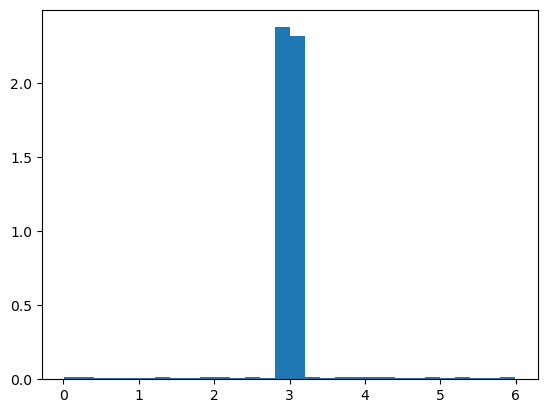

In [102]:
n_samples = 10000
samples = sample(n_samples)
plt.hist(samples[0], density=True, bins=bins_per_dim)

<Axes: >

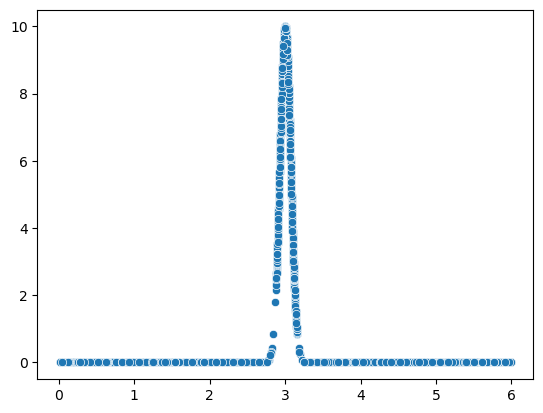

In [103]:
sns.scatterplot(x=samples[0], y=integrand(samples))

(array([0.94490876, 0.00830008, 0.00650006, 0.00580005, 0.00490005,
        0.00400004, 0.00510005, 0.00410004, 0.00430004, 0.01210011]),
 array([0.        , 0.99999073, 1.99998145, 2.99997218, 3.99996291,
        4.99995363, 5.99994436, 6.99993509, 7.99992581, 8.99991654,
        9.99990727]),
 <BarContainer object of 10 artists>)

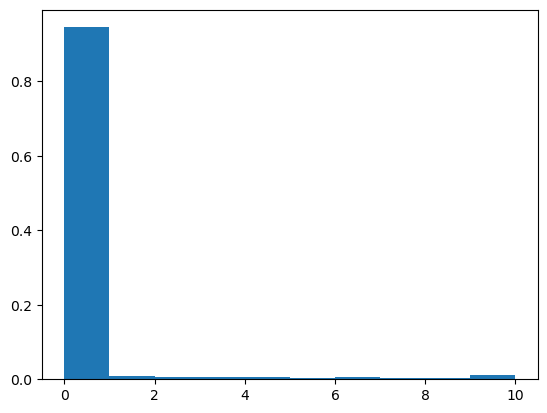

In [38]:
plt.hist(results, density=True, bins=bins_per_dim)